In [2]:
# Basics
import os
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

# Checking
import IPython

### 1. Futures price

In [38]:
cwd = os.getcwd()

# Read in prices data

filename = 'Futures_price_Wheat_2020_Dec.csv'
location = os.path.join(cwd, filename)
futures_df = pd.read_csv(location, header=0)

In [39]:
futures_df.dropna()
futures_df['Date'] = [datetime.strptime(x, '%m/%d/%Y').date() \
                    for x in futures_df['Date']]
futures_df = futures_df[futures_df['Date']>datetime(2020,1,1).date()]

Text(0.5, 1.0, 'Wheat Futures Prices (2020 December Contract)')

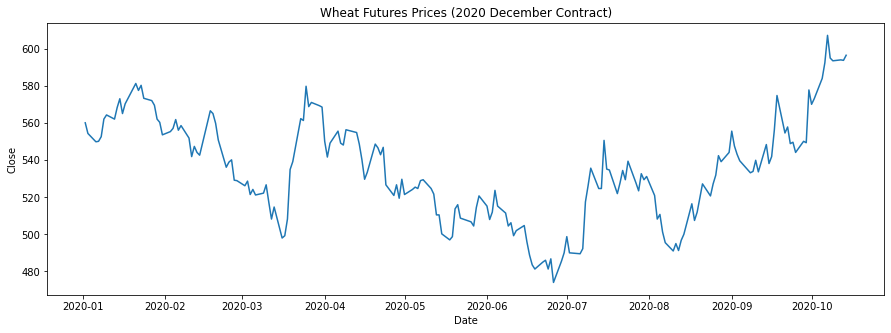

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=futures_df, \
             x="Date", \
             y="Close").set_title("Wheat Futures Prices (2020 December Contract)")

### 2. Spot prices

In [23]:
# Read in prices data

filename = 'Spot_prices\\DARK NORTHERN SPRING_14%.xls'
location = os.path.join(cwd, filename)
price_df = pd.read_html(location, header=None)
price_df = price_df[0]

In [24]:
price_df.columns = ['Date', 'Location', 'Class', 'Variety', 'Grade', 'Units', 'Transmode',
                    'Bid_level_low', 'Bid_level_high', 'Pricing_point', 'Delivery_period']
price_df = price_df[price_df['Delivery_period']=='Cash']
price_df['Date'] = [datetime.strptime(x, '%m/%d/%Y').date() \
                    for x in price_df['Date']]

In [25]:
list_locations = ['East River-So. Dakota, SD', 'Great Falls, MT', 'Minneapolis, MN']
boolean = price_df['Location'].isin(list_locations)
price_df = price_df[boolean]

Text(0.5, 1.0, 'Dark Northern Spring 14% Spot Prices')

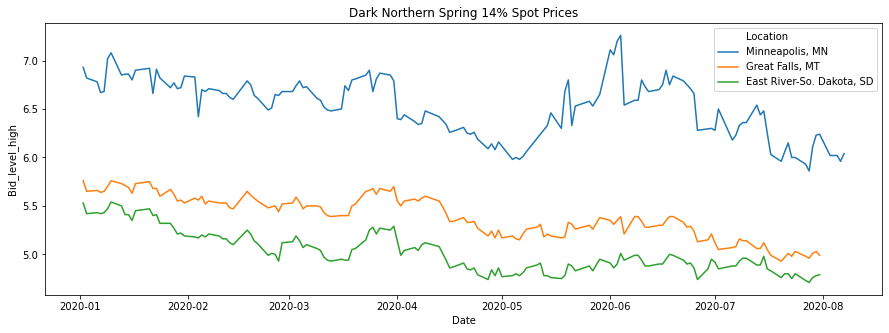

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=price_df, \
             x="Date", \
             y="Bid_level_high", \
             hue='Location').set_title("Dark Northern Spring 14% Spot Prices")

In [29]:
# Read in prices data

filename = 'Spot_prices\\CLUB WHITE.xls'
location = os.path.join(cwd, filename)
price_df = pd.read_html(location, header=None)
price_df = price_df[0]

In [30]:
price_df.columns = ['Date', 'Location', 'Class', 'Variety', 'Grade', 'Units', 'Transmode',
                    'Bid_level_low', 'Bid_level_high', 'Pricing_point', 'Delivery_period']
price_df = price_df[price_df['Delivery_period']=='30 Day Delivery']
price_df['Date'] = [datetime.strptime(x, '%m/%d/%Y').date() \
                    for x in price_df['Date']]

Text(0.5, 1.0, 'Club White Spot Prices')

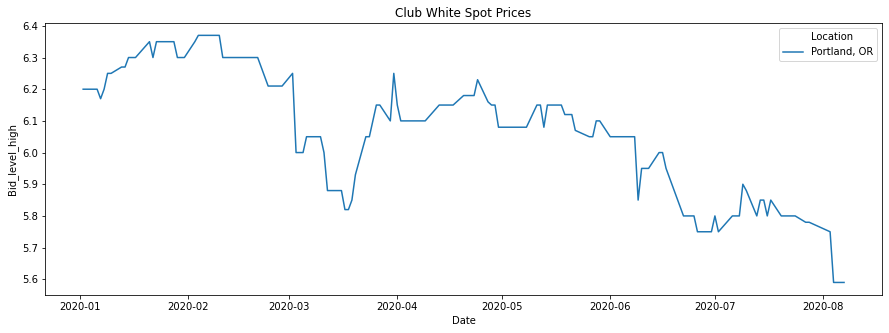

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=price_df, \
             x="Date", \
             y="Bid_level_high", \
             hue='Location').set_title("Club White Spot Prices")

### 3. Storage

In [68]:
# Read in stock data

filename = 'Wheat_stock.xlsx'
location = os.path.join(cwd, filename)
stock_df = pd.read_excel(location, header=1)

In [72]:
stock_df['Year'] = [x.year for x in stock_df['Report_date']]
stock_df['Report Date Each Year'] = [x.month for x in stock_df['Report_date']]
numtostr = {"Report Date Each Year": {3: 'March 1st', 6: 'June 1st', 9: 'September 1st', 12: 'December 1st'}}
stock_df.replace(numtostr, inplace=True)

Text(0.5, 1.0, 'Stock Reported in March, June, September, and December from 2016 to 2020 (1,000 Bushels)')

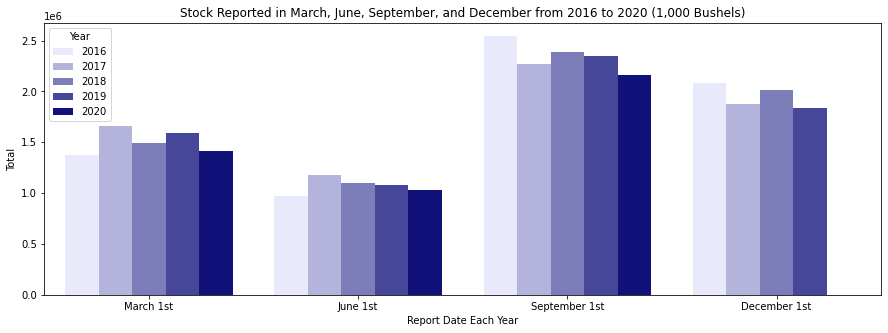

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Report Date Each Year", y="Total", hue="Year", data=stock_df, color='darkblue').set_title("Total Stock Reported from 2016 to 2020 (1,000 Bushels)")

Text(0.5, 1.0, 'Stock on Farms Reported from 2016 to 2020 (1,000 Bushels)')

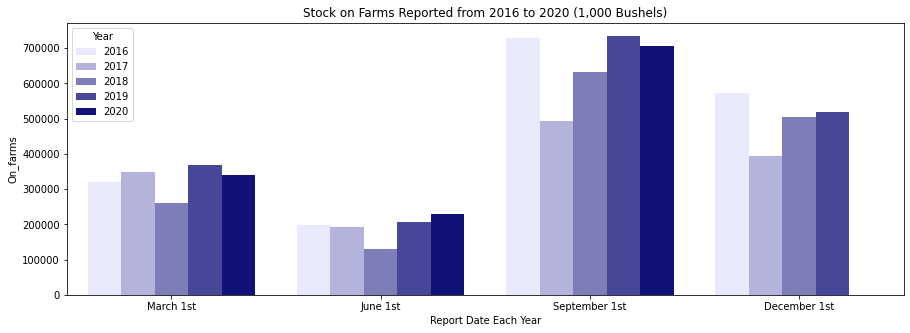

In [77]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Report Date Each Year", y="On_farms", hue="Year", data=stock_df, color='darkblue').set_title("Stock on Farms Reported from 2016 to 2020 (1,000 Bushels)")

Text(0.5, 1.0, 'Stock off Farms Reported from 2016 to 2020 (1,000 Bushels)')

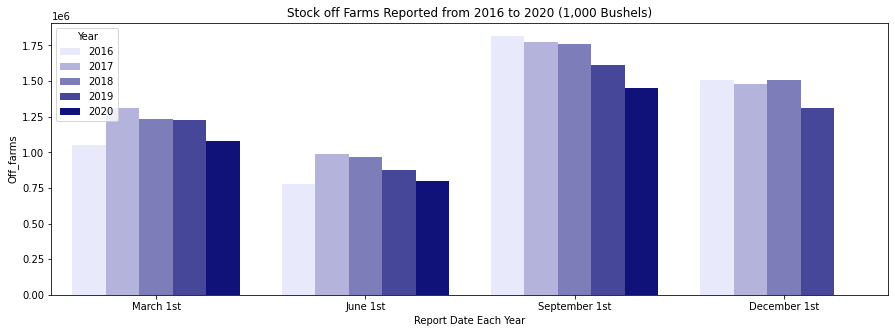

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Report Date Each Year", y="Off_farms", hue="Year", data=stock_df, color='darkblue').set_title("Stock off Farms Reported from 2016 to 2020 (1,000 Bushels)")